### Import Necessary Libraries

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

#### Read the train file

In [2]:
loan_file = pd.read_csv('train_file.csv')

#### Display first 5 records from the file

In [3]:
loan_file.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Understand the structure of the datasets

In [4]:
loan_file.shape

(614, 13)

The dataset has totally 614 records and 13 features(input independent= 12 + output dependent = 1)

#### Display the datatypes of the columns in the file

In [5]:
loan_file.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Inference:                 
We have a mix of inputs categorical & numerical.    
Target variable = 'Loan_Status'

#### Display the details about the dataset read

In [6]:
loan_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We can notice there are some null values present in the file. As for some of the columns non-null values are not equal to the total count. 

#### Check for nullable values for all the independent variables

In [7]:
loan_file.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

List of columns with null values :         
'Gender'                 
'Married'                       
'Dependents'                          
'Self-Employed'              
'LoanAmount'                    
'Loan_Amount_Term'               
'Credit_History'          

#### Display the total count of null values w.r.t to the null columns

In [8]:
loan_file.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

'Credit_History' input field has 50 null values & the highest when compared to the rest. 

#### Null values can either be handled by properly filling the data or it can be dropped. For now, we will drop the null values

In [9]:
print('Number of training samples before dropping the null values:', loan_file.shape[0])

loan_file.dropna(axis=0, inplace=True) #inplace = True make the changes permanently applied to the dataset

print('Number of training samples after dropping the null values:', loan_file.shape[0])

Number of training samples before dropping the null values: 614
Number of training samples after dropping the null values: 480


In [10]:
loan_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


Now there are no null values. 

#### check for the presence of duplicates

In [11]:
loan_file.duplicated().sum()

0

There are no duplicates present

#### Descriptive statistics of the dataset

In [12]:
loan_file.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [13]:
#the field Loan_ID can be dropped as it is a running sequence number, does not carry significant meaning
loan_file.drop('Loan_ID', axis=1, inplace=True)

#### Data Visualization - Categorical Features Vs Categorical Features

#### (1) Display a count plot for target variable

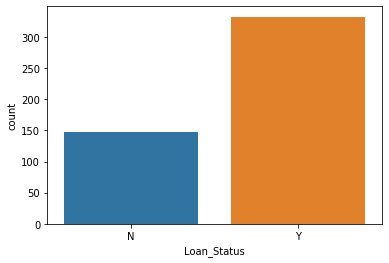

In [14]:
sns.countplot(loan_file['Loan_Status'])

Inference: The Dataset is heavily imbalanced with Loan_Status = 'Y' (high count) and Loan_Status = 'N' (low count)

#### (2) Pick the categorical inputs and see how the values are related to the output variable 'Loan Status'

In [15]:
#categorical inputs are denoted by the datatype = 'object'

object_features = loan_file.select_dtypes(include = 'object').columns

print(object_features)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


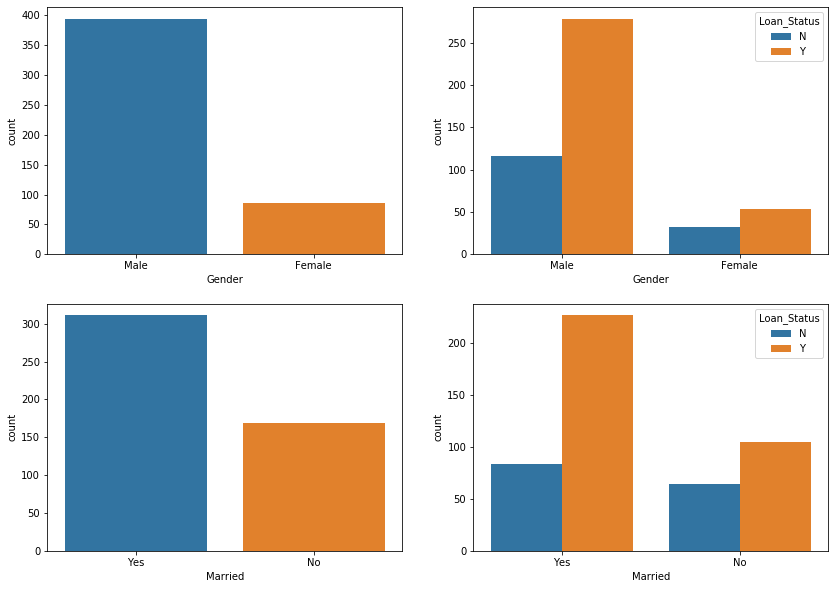

In [16]:
#we can display multiple plots using subplots

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.countplot(loan_file['Gender']) 

plt.subplot(2,2,2)
sns.countplot(loan_file['Gender'], hue = loan_file['Loan_Status']) #hue command helps to subdivide the data based on another

plt.subplot(2,2,3)
sns.countplot(loan_file['Married']) 

plt.subplot(2,2,4)
sns.countplot(loan_file['Married'], hue = loan_file['Loan_Status']) 

#### some statistical observations of 'Gender' & 'Married'              

1) The count of records corresponding to 'Male' is higher than 'Female'          
2) The ratio between married and unmarried is 2:1

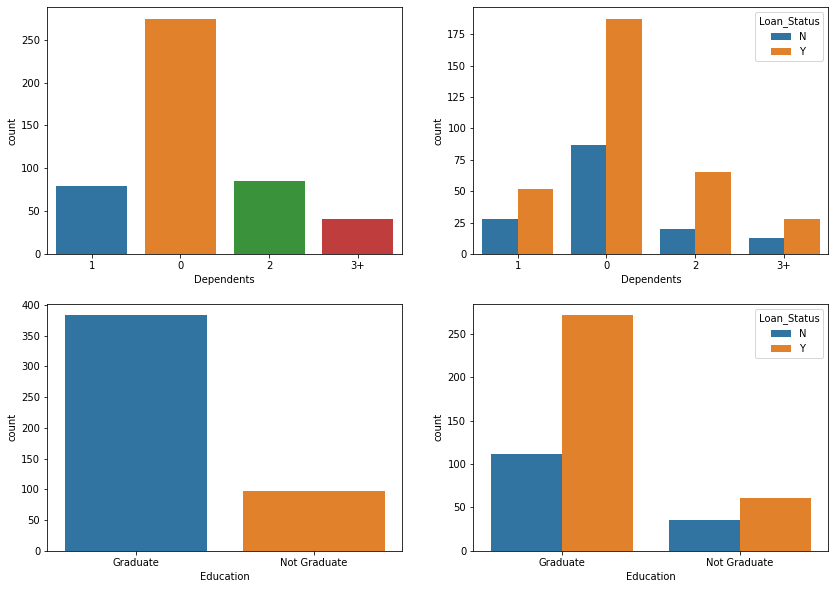

In [17]:
#we can display multiple plots using subplots

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.countplot(loan_file['Dependents']) 

plt.subplot(2,2,2)
sns.countplot(loan_file['Dependents'], hue = loan_file['Loan_Status']) #hue command helps to subdivide the data based on another

plt.subplot(2,2,3)
sns.countplot(loan_file['Education']) 

plt.subplot(2,2,4)
sns.countplot(loan_file['Education'], hue = loan_file['Loan_Status']) 

#### Data observations based on 'Dependents' & 'Education'        
1) Most of the applicants do not have any dependents.          
2) The number of Graduates are higher than the not graduated.

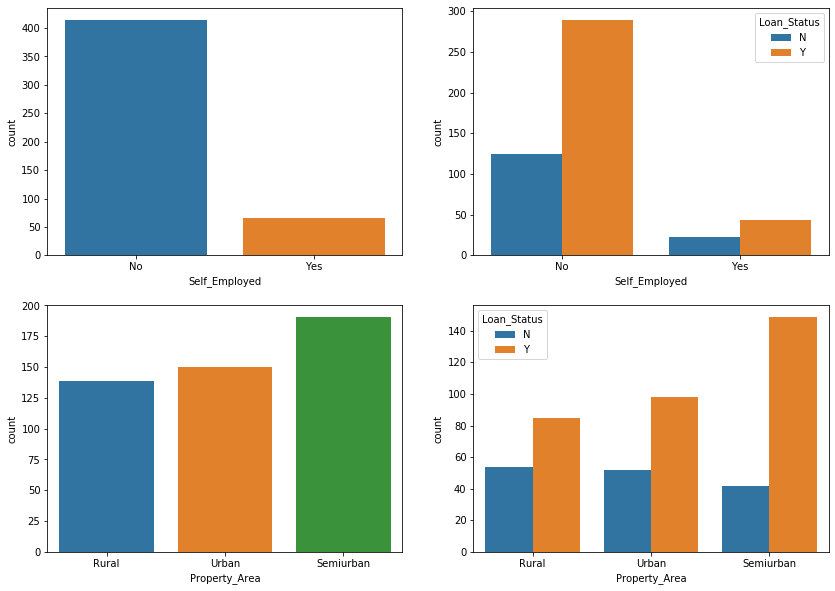

In [18]:
#we can display multiple plots using subplots

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.countplot(loan_file['Self_Employed']) 

plt.subplot(2,2,2)
sns.countplot(loan_file['Self_Employed'], hue = loan_file['Loan_Status']) #hue command helps to subdivide the data based on another

plt.subplot(2,2,3)
sns.countplot(loan_file['Property_Area']) 

plt.subplot(2,2,4)
sns.countplot(loan_file['Property_Area'], hue = loan_file['Loan_Status']) 

#### Data observations based on 'Self_Employed' & 'Property_Area'        
1) Most of the applicants are not Self_Employed.                  
2) The Rural & Urban Property has similar count, whereas Semiurban seems to have slightly higher proprotion.

#### Even though 'Credit_History' is shown as numeric, it is basically a categorical value with values '0' & '1'

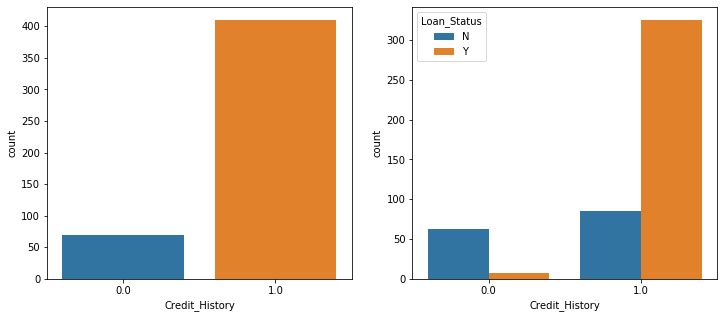

In [19]:
#we can display multiple plots using subplots

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(loan_file['Credit_History']) 

plt.subplot(1,2,2)
sns.countplot(loan_file['Credit_History'], hue = loan_file['Loan_Status']) #hue command helps to subdivide the data based on another


#### Display the count of records based on the field 'Credit_History'

In [20]:
loan_file['Credit_History'].value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

In [21]:
#cross tab helps to display the combination of the data in tabular format
pd.crosstab(loan_file['Self_Employed'], loan_file['Loan_Status'])

Loan_Status,N,Y
Self_Employed,,
No,125,289
Yes,23,43


#### Display the categorical features

In [22]:
print(object_features)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


In [23]:
obj_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History',
            'Property_Area', 'Loan_Status']
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

#### Use Chi-Squared test to figure out the correlation between two discrete variables

In [24]:
chisquare_df = pd.DataFrame([], columns=obj_cols, index = obj_cols)

#calculate the pvalue from chisquare stats
for i in obj_cols:            
    for j in obj_cols:            
        cont = pd.crosstab(loan_file[i], loan_file[j])            
        chisquare_df.loc[i,j] = chi2_contingency(cont)[1]   
        
chisquare_df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
Gender,6.36969e-105,5.03882e-14,2.62336e-05,0.250231,0.910566,0.746561,0.0590603,0.199018
Married,5.03882e-14,1.91182e-105,7.36858e-18,0.934011,0.83784,0.615633,0.674738,0.0184055
Dependents,2.62336e-05,7.36858e-18,1.75835e-304,0.886722,0.201808,0.499816,0.0535204,0.40721
Education,0.250231,0.934011,0.886722,4.73023e-105,0.957225,0.280035,0.332869,0.168724
Self_Employed,0.910566,0.83784,0.201808,0.957225,1.43395e-104,0.742464,0.502958,0.537194
Credit_History,0.746561,0.615633,0.499816,0.280035,0.742464,1.17305e-104,0.594904,2.13598e-30
Property_Area,0.0590603,0.674738,0.0535204,0.332869,0.502958,0.594904,1.66262e-206,0.00221396
Loan_Status,0.199018,0.0184055,0.40721,0.168724,0.537194,2.13598e-30,0.00221396,2.2263e-105


#### Observations:    
1) If we notice the  diagonals, the probability(area) is minimal indicating the dependency is high. Since we are finding the correlation beween the same variable, it is expected(large correlation).     

2) For 'Loan_Status', the order of dominant features are as below.         
   High Influence - 'Credit_History', 'Property_Area', 'Married'   
   Medium Influence - 'Education', 'Gender'   
   Low Influence - 'Dependents', 'Self_Employed'
   
3) Rest of the correlation between the independent variables.              
   Gender - High relation with 'Married', 'Dependents'              
   Married - 'Gender', 'Dependents'                 
   Dependents - 'Gender', 'Married'                                
   
   We can say 'Gender', 'Married' & 'Dependents' have good correlation between them.      
  

#### Data Visualization - Categorical Features Vs Continuous Features

#### We can use swarm plot & box plot to find the association between Categorical & Continuous variables

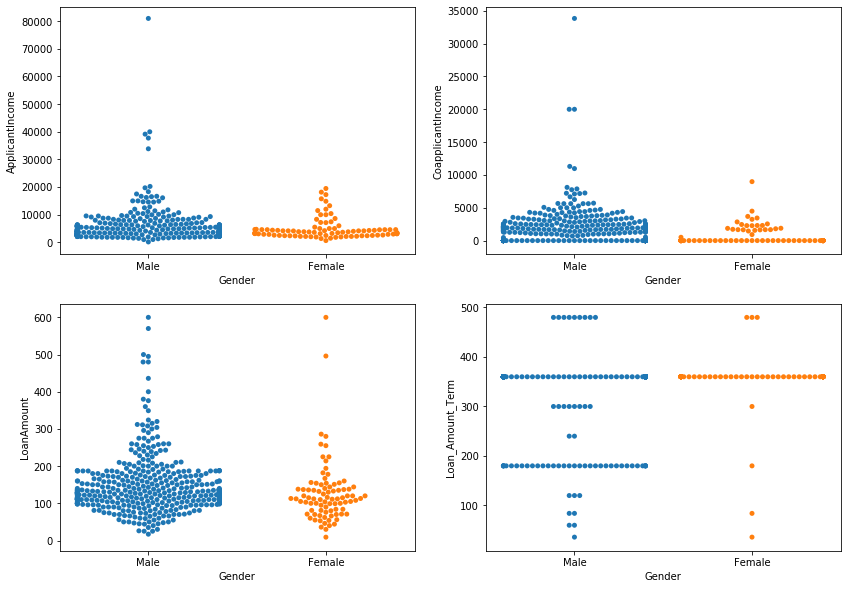

In [25]:
#we can display multiple plots using subplots

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.swarmplot(loan_file['Gender'], loan_file['ApplicantIncome']) 

plt.subplot(2,2,2)
sns.swarmplot(loan_file['Gender'], loan_file['CoapplicantIncome']) 

plt.subplot(2,2,3)
sns.swarmplot(loan_file['Gender'], loan_file['LoanAmount'])

plt.subplot(2,2,4)
sns.swarmplot(loan_file['Gender'], loan_file['Loan_Amount_Term'])

#### We can find some outliers in the graph. 

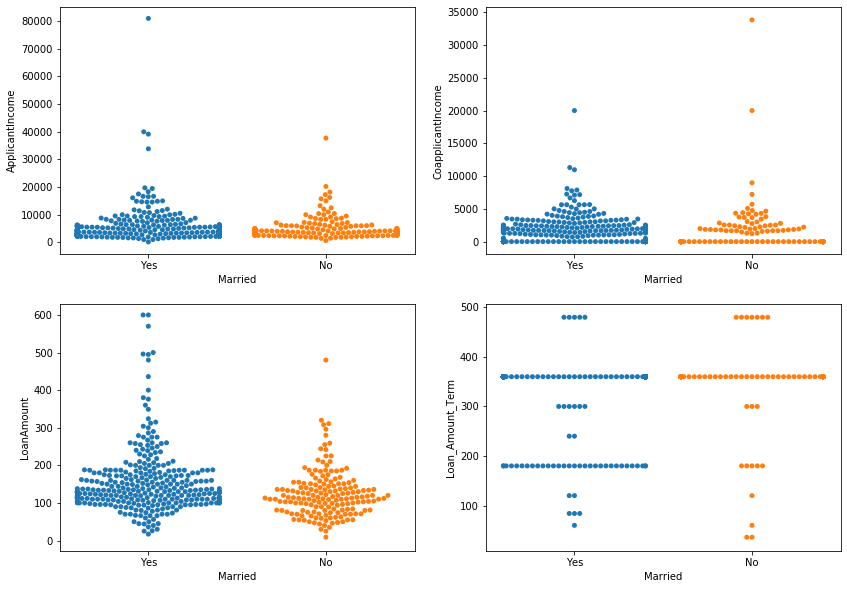

In [26]:
#we can display multiple plots using subplots

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.swarmplot(loan_file['Married'], loan_file['ApplicantIncome'])

plt.subplot(2,2,2)
sns.swarmplot(loan_file['Married'], loan_file['CoapplicantIncome']) 

plt.subplot(2,2,3)
sns.swarmplot(loan_file['Married'], loan_file['LoanAmount']) 

plt.subplot(2,2,4)
sns.swarmplot(loan_file['Married'], loan_file['Loan_Amount_Term']) 

#### Use box plot for 'Loan_Status'

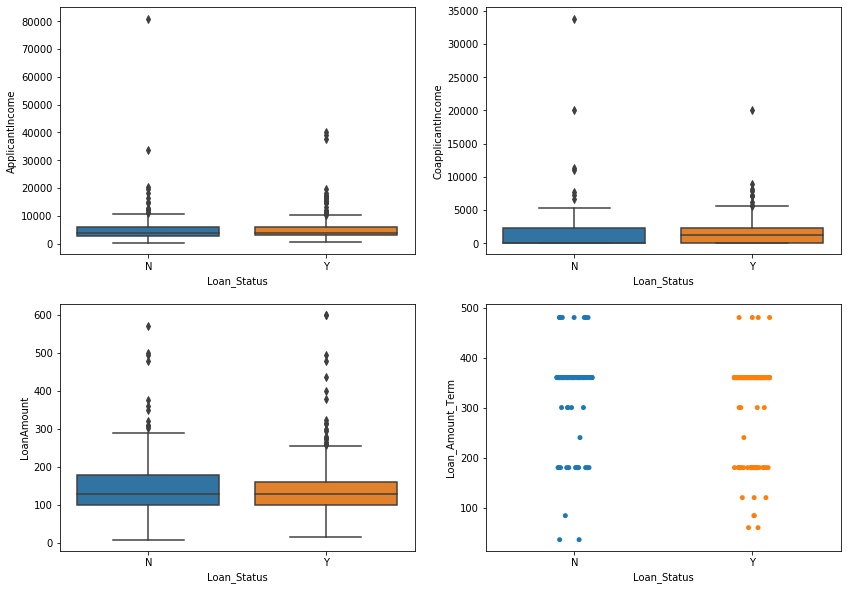

In [27]:
#we can display multiple plots using subplots

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(loan_file['Loan_Status'], loan_file['ApplicantIncome']) 

plt.subplot(2,2,2)
sns.boxplot(loan_file['Loan_Status'], loan_file['CoapplicantIncome']) 

plt.subplot(2,2,3)
sns.boxplot(loan_file['Loan_Status'], loan_file['LoanAmount']) 

plt.subplot(2,2,4)
sns.stripplot(loan_file['Loan_Status'], loan_file['Loan_Amount_Term']) 

We could Notice some outliers in the data. As of now we will the outliers as such. Treating outliers has been kept for separate discussion. 

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [29]:
anova_result = pd.DataFrame([])

#applying anova test for continuous variable and discrete variables
for i in num_cols:
    for j in obj_cols:        
        model = ols(i+' ~ C('+j+')', loan_file).fit()
        anova_result.loc[i,j] = sm.stats.anova_lm(model,typ=1).iloc[0]['PR(>F)']
        
anova_result

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
ApplicantIncome,0.475524,0.422200,0.002453,0.003992,0.000170,0.219448,0.509118,0.345487
CoapplicantIncome,0.000595,0.024093,0.902559,0.103061,0.973699,0.849362,0.974227,0.283806
LoanAmount,0.030150,0.000053,0.000657,0.000142,0.008283,0.372751,0.054227,0.116428
Loan_Amount_Term,0.052116,0.018474,0.029453,0.025195,0.446172,0.471568,0.359671,0.864700


#### Inference:            
1) The values displayed in the table corresponds to the probability(area covered). For the dependency rule, the null hypothesis should be rejected. The rejection area is 5% (0.05).                  

2) The target variable 'Loan_Status' does not have a great correlation with input predictors. 'LoanAmount' has some what correlation & 'Loan_Amount_Term' does not have any correlation at all as the value is 0.8647.

3) If we analyse rest of the features,

   => 'ApplicantIncome' has higher correlation with 'Dependents', 'Education' & 'Self_Employed'.                           
   => 'CoaaplicantIncome' has strong interrelation with 'Gender' & 'Married'.                          
   => 'LoanAmount' is linked to 'Gender', 'Married', 'Dependents', 'Education' and 'Self_Employed'. 
       This denotes, definitely 'LoanAmount' has a significant predicting power.                      
   => 'Loan_Amount_Term' has a correlation with 'Gender', 'Married', 'Dependents' and 'Education'.               

#### Data Visualization - Continuous Features Vs Continuous Features

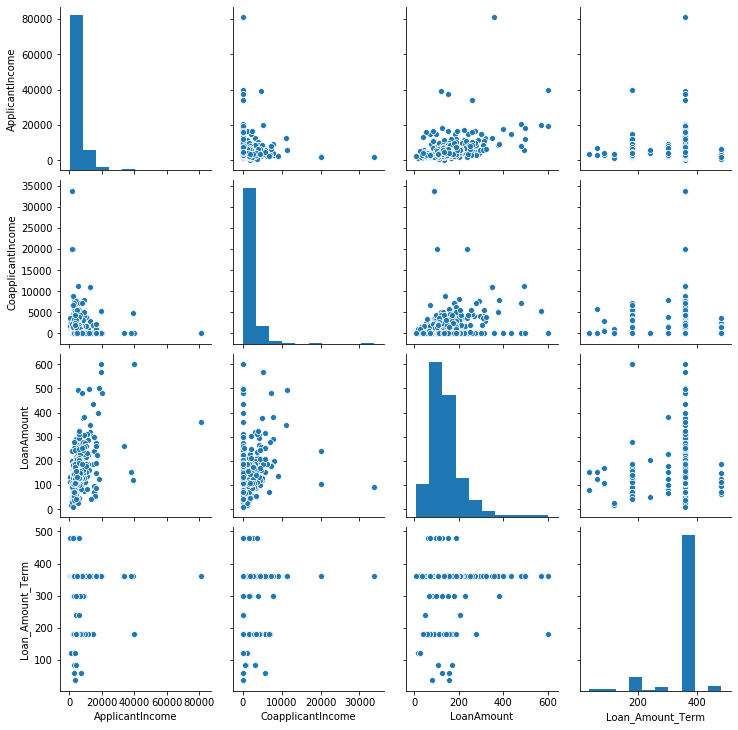

In [30]:
sns.pairplot(loan_file[['ApplicantIncome', 'CoapplicantIncome' ,'LoanAmount', 'Loan_Amount_Term']])

#### let's find the correlation between the continuous variables using pearson correlation and heatmap

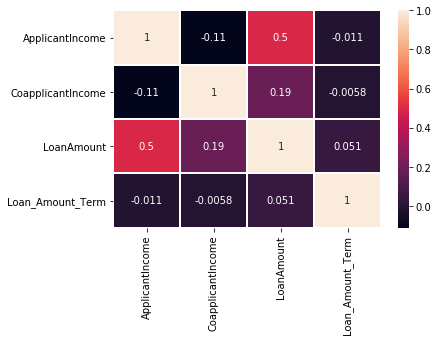

In [31]:
sns.heatmap(loan_file[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']].corr(), annot=True, linewidth=1)

#### correlation Inference

'LoanAmount' & 'ApplicantIncome' has a correlation of 0.5

#### Coversion of categorical variables into numbers

The input to Machine learning model should be number(cannot be a description).The two methods to convert the categorical values are:

1) One-hot Encoding (0's & 1's). In our case we will go with one-hot encoding.   
2) Label Encoding ( 0, 1, 2, 3, 4) - usually preferred for ordinal values or dichotomous categorical variables.

In [32]:
onehotencoder = OneHotEncoder(sparse=False)
labelencoder = LabelEncoder()

#for binary values
loan_file['Gender'] = labelencoder.fit_transform(loan_file['Gender'])
loan_file['Married'] = labelencoder.fit_transform(loan_file['Married'])
loan_file['Education'] = labelencoder.fit_transform(loan_file['Education'])
loan_file['Self_Employed'] = labelencoder.fit_transform(loan_file['Self_Employed'])
loan_file['Loan_Status'] = labelencoder.fit_transform(loan_file['Loan_Status'])

#for non-binary categorical predictors
integer_encoded = labelencoder.fit_transform(loan_file['Property_Area'])
print('Label Encoded Property_Area:\n', integer_encoded)

integer_encoded = integer_encoded.reshape(-1,1)               #the data is reshaped in order to input into onehotencoding
onehot_encoded = onehotencoder.fit_transform(integer_encoded)
print('\nOne hot Encoded Property_Area:\n', onehot_encoded)

Property_Area = pd.DataFrame(onehot_encoded, columns=['property-rural', 'property-semiurban', 'property-urban'])

#use inverse transform to get the original value back
inverted = labelencoder.inverse_transform([np.argmax(onehot_encoded[0, :])])

print('\nThe lable encoded value for the Property_Area first value:', integer_encoded[0])
print('The onehot encoded value for the Property_Area first value:', onehot_encoded[0])
print('The original categorical value for the Property_Area first row:', inverted)


integer_encoded = labelencoder.fit_transform(loan_file['Dependents'])
integer_encoded = integer_encoded.reshape(-1,1)                 #the data is reshaped in order to input into onehotencoding
onehot_encoded = onehotencoder.fit_transform(integer_encoded)

Dependents = pd.DataFrame(onehot_encoded, columns=['Dependents-0', 'Dependents-1', 'Dependents-2', 'Dependents-3+'])


Label Encoded Property_Area:
 [0 2 2 2 2 2 1 2 1 2 2 0 2 2 2 0 2 2 1 1 1 2 2 2 0 1 0 1 2 1 2 2 1 2 2 2 1
 1 1 1 2 2 1 1 0 2 2 2 2 0 1 1 2 2 2 1 2 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 2
 1 1 1 1 1 1 2 1 2 2 2 1 2 0 1 0 2 1 1 1 0 2 2 1 1 1 1 0 2 1 0 0 2 1 1 2 1
 2 2 0 1 0 0 2 0 2 1 2 1 1 2 1 0 2 0 0 1 1 0 1 1 0 0 1 1 2 2 1 1 1 1 0 0 0
 1 2 1 0 1 0 2 1 1 2 1 1 2 0 2 1 1 1 2 0 2 1 0 1 2 1 1 1 0 1 0 1 1 1 0 0 1
 0 2 2 0 1 2 2 2 1 2 1 2 0 1 2 0 0 2 0 1 1 0 1 0 1 2 2 2 2 0 1 1 1 1 2 1 2
 1 2 2 0 1 0 1 0 0 1 2 1 1 2 0 2 2 0 2 0 0 2 0 1 1 0 2 1 0 1 1 0 0 0 1 2 2
 2 1 0 1 0 0 2 1 1 2 0 1 0 0 0 1 0 2 2 1 1 1 2 0 0 1 1 0 1 1 0 2 2 0 2 2 1
 2 2 2 1 2 0 0 0 1 2 2 2 0 1 2 0 1 1 0 1 2 0 1 0 1 0 0 1 2 2 2 0 1 0 2 1 0
 0 1 0 2 1 0 1 2 1 2 0 1 0 1 1 0 0 0 0 0 0 1 1 2 2 0 1 2 0 1 0 2 2 1 0 1 0
 0 1 1 0 0 1 1 1 0 0 2 1 2 0 1 0 1 0 1 0 0 1 1 1 0 2 2 0 1 2 1 0 0 1 1 0 1
 1 0 0 0 1 1 1 1 2 0 2 2 1 0 0 1 1 2 0 1 0 1 0 2 2 0 1 1 1 1 1 1 0 1 2 2 0
 2 2 2 2 1 1 2 2 0 1 2 1 0 0 2 1 1 1 1 0 2 0 0 0 2 2 0 1 1 0 0 0 0 2 2

In [33]:
Property_Area.head()

,property-rural,property-semiurban,property-urban
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


We can drop either one of the fields, because when the third field is '1' it automatically implies other two columns have zeros.

In [34]:
Property_Area.drop('property-urban', axis=1, inplace=True)

In [35]:
Dependents.head()

,Dependents-0,Dependents-1,Dependents-2,Dependents-3+
0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0


We can drop the field 'Dependents-3+'.

In [36]:
Dependents.drop('Dependents-3+', axis=1, inplace=True)

#### we have to merge all these files with the orginal data, but before that we need to drop the 'Property_Area' & 'Dependents'

In [37]:
loan_file.drop(['Property_Area', 'Dependents'], axis=1, inplace=True)

In [38]:
loan_file.index = Dependents.index

In [39]:
loan_file = loan_file.join(Property_Area).join(Dependents)

In [40]:
loan_file.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,property-rural,property-semiurban,Dependents-0,Dependents-1,Dependents-2
0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1.0,0.0,0.0,1.0,0.0
1,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,0.0,0.0,1.0,0.0,0.0
2,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,0.0,0.0,1.0,0.0,0.0
3,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,0.0,0.0,1.0,0.0,0.0
4,1,1,0,1,5417,4196.0,267.0,360.0,1.0,1,0.0,0.0,0.0,0.0,1.0


#### Display the file details

In [41]:
loan_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              480 non-null    int32  
 1   Married             480 non-null    int32  
 2   Education           480 non-null    int32  
 3   Self_Employed       480 non-null    int32  
 4   ApplicantIncome     480 non-null    int64  
 5   CoapplicantIncome   480 non-null    float64
 6   LoanAmount          480 non-null    float64
 7   Loan_Amount_Term    480 non-null    float64
 8   Credit_History      480 non-null    float64
 9   Loan_Status         480 non-null    int32  
 10  property-rural      480 non-null    float64
 11  property-semiurban  480 non-null    float64
 12  Dependents-0        480 non-null    float64
 13  Dependents-1        480 non-null    float64
 14  Dependents-2        480 non-null    float64
dtypes: float64(9), int32(5), int64(1)
memory usage: 47.0 KB


In [42]:
corr_loanstatus = pd.concat([anova_result['Loan_Status'], chisquare_df['Loan_Status']])
corr_loanstatus.sort_values()

Loan_Status          2.2263e-105
Credit_History       2.13598e-30
Property_Area         0.00221396
Married                0.0184055
LoanAmount              0.116428
Education               0.168724
Gender                  0.199018
CoapplicantIncome       0.283806
ApplicantIncome         0.345487
Dependents               0.40721
Self_Employed           0.537194
Loan_Amount_Term          0.8647
Name: Loan_Status, dtype: object

In [43]:
loan_file.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'property-rural', 'property-semiurban', 'Dependents-0',
       'Dependents-1', 'Dependents-2'],
      dtype='object')

#### Retaining only powerful predictors('Credit_History', 'Property_Area', 'Married' & 'LoanAmount')

#### Split the data into train & test. with test_size = 0.2

In [341]:
X = loan_file[['Credit_History', 'property-rural', 'property-semiurban', 'Married', 'LoanAmount']]
y = loan_file['Loan_Status']

In [342]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=100)

In [343]:
#Apply standard scaler
standardscaler = StandardScaler()

train_x['LoanAmount'] = standardscaler.fit_transform(np.array(train_x['LoanAmount']).reshape(-1,1))
test_x['LoanAmount'] = standardscaler.transform(np.array(test_x['LoanAmount']).reshape(-1,1))

#### Implementaion of Logistic Regression from Scratch

In [344]:
#declare a class for logistic regression algorithm
class Logistic_Regression():   
    
    
    # Method to initialize weights and bias
    def __init__(self, num_features):        
        self.weights = np.zeros((1, num_features))
        self.bias = 0
        
    # function for forward pass
    def forward_propagation(self, train_x):
        z = np.dot(self.weights, train_x.T) + self.bias        
        #sigmoid function
        self.ypred = 1 / (1 + np.exp(-z)) 
        
    # cost calculation using binary cross entropy
    def loss_function(self, train_y):   
        m = train_y.shape[0]
        cost_calc = -(np.dot(train_y,np.log(self.ypred.T)) + np.dot((1 - train_y),np.log(1 - self.ypred).T) ) / m
        return cost_calc
        
    #back propagation to update the learnable parameters weights and bias
    def back_propagation(self, train_x, train_y, learning_rate):
        
        m = train_y.shape[0]
        dz = self.ypred - np.array(train_y).reshape(train_y.shape[0]) #same shape for the predicted and expected
        dW = np.dot(dz, train_x) / m        
        db = np.sum(dz) / m
        
        self.weights = self.weights - (learning_rate * dW)
        self.bias = self.bias - (learning_rate * db)        
        
    #predict method to forecast the test output 
    def predict(self, test_x):
        z = np.dot(self.weights, test_x.T) + self.bias
        predict_test = 1 / (1 + np.exp(-z))     
        return predict_test

In [345]:
train_x.shape

(384, 5)

In [346]:
logisticregression = Logistic_Regression(5)
for i in range(5000):
    logisticregression.forward_propagation(train_x)    
    cost_calc = logisticregression.loss_function(train_y)   
    if (i % 500 == 0):
        print('The loss value at {} th iteration is: {}'.format(i, cost_calc))
    
    logisticregression.back_propagation(train_x, train_y, 0.01)

The loss value at 0 th iteration is: [0.69314718]
The loss value at 500 th iteration is: [0.56440699]
The loss value at 1000 th iteration is: [0.54752178]
The loss value at 1500 th iteration is: [0.53520272]
The loss value at 2000 th iteration is: [0.52546292]
The loss value at 2500 th iteration is: [0.51757754]
The loss value at 3000 th iteration is: [0.51109127]
The loss value at 3500 th iteration is: [0.50568914]
The loss value at 4000 th iteration is: [0.50114347]
The loss value at 4500 th iteration is: [0.49728462]


In [347]:
predict = logisticregression.predict(test_x)

In [348]:
output = predict > 0.5

In [349]:
output

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False, False,  True,  True, False,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False, False, False, False,  True,
         True,  True,  True,  True,  True,  True]])

In [350]:
final_predicted = output.astype(int)

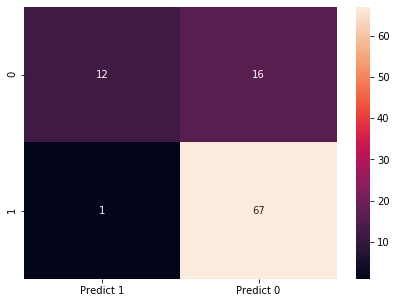

In [351]:
#print confusion matrix
cm = confusion_matrix(test_y,final_predicted.T, labels = [0,1])
df = pd.DataFrame(cm , index = ["0","1"],
                  columns = ["Predict 1","Predict 0"])
plt.figure(figsize = (7,5))
sns.heatmap(df,annot= True)

In [352]:
accuracy_df = pd.DataFrame([], columns=['accuracy_score', 'Precision', 'Recall', 'f1_score'])

In [353]:
accuracy_df.loc['Execution','accuracy_score'] = accuracy_score(test_y, final_predicted.T)
accuracy_df.loc['Execution','Precision'] = precision_score(test_y, final_predicted.T)
accuracy_df.loc['Execution','Recall'] = recall_score(test_y, final_predicted.T)
accuracy_df.loc['Execution','f1_score'] = f1_score(test_y, final_predicted.T)

In [354]:
accuracy_df

,accuracy_score,Precision,Recall,f1_score
Execution,0.822917,0.807229,0.985294,0.887417
